<a href="https://colab.research.google.com/github/SaijyotiTripathy/SANEP2020/blob/main/SANEP2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import nltk
import re

In [2]:
original_file = pd.read_csv("/content/NEP_2020_english_tweet.csv")

In [3]:
original_file.head()

,Unnamed: 0,Author_ID,Date_of_tweet,Tweet,Likes_on_tweet,User_handle,Tweet_link
0,0,60483175,2020-08-04 23:31:59+00:00,Historically #TamilNadu has been a state with ...,1,venkattcv,https://twitter.com/venkattcv/status/129079263...
1,1,1178900491595636736,2020-08-04 23:31:56+00:00,#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...,0,BethEYoung3,https://twitter.com/BethEYoung3/status/1290792...
2,2,1072481505090318341,2020-08-04 22:22:30+00:00,@cbseindia29 @PMOIndia @narendramodi @DrRPNish...,1,PatelPrerak18,https://twitter.com/PatelPrerak18/status/12907...
3,3,583518901,2020-08-04 22:20:56+00:00,@PMOIndia’s anti-democratic #NEP2020 was 400+ ...,1,kchongpacrim,https://twitter.com/kchongpacrim/status/129077...
4,4,36339871,2020-08-04 21:01:14+00:00,The latest The Nursing Education Daily! http:/...,0,SkyscapeInc,https://twitter.com/SkyscapeInc/status/1290754...


In [4]:
original_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18240 entries, 0 to 18239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      18240 non-null  int64 
 1   Author_ID       18240 non-null  int64 
 2   Date_of_tweet   18240 non-null  object
 3   Tweet           18240 non-null  object
 4   Likes_on_tweet  18240 non-null  int64 
 5   User_handle     18240 non-null  object
 6   Tweet_link      18240 non-null  object
dtypes: int64(3), object(4)
memory usage: 997.6+ KB


In [5]:
#DATA PREPROCESSING

#Checking for Null values
np.sum(original_file.isnull().any(axis=1))

0

In [6]:
#Dropping the first column
original_file.drop(columns=["Unnamed: 0","Author_ID","User_handle"],inplace=True)

original_file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18240 entries, 0 to 18239
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date_of_tweet   18240 non-null  object
 1   Tweet           18240 non-null  object
 2   Likes_on_tweet  18240 non-null  int64 
 3   Tweet_link      18240 non-null  object
dtypes: int64(1), object(3)
memory usage: 570.1+ KB


In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#defining a function to get rid of stopwords, punctuation, hashtags, mentions, links, and one or two-letter words
def process_tweets(original_tweet):

  # Removes links
  original_tweet = re.sub(r"http\S+|www\S+|https\S+", '', original_tweet, flags=re.MULTILINE)
    
  # Removes mentions and hashtag
  original_tweet = re.sub(r'\@\w+|\#','', original_tweet)
    
  # Tokenizes the words
  tokenized = word_tokenize(original_tweet)

  # Removes the stop words from the tokens
  tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

  # Lemmatizes the adjectives in the tokens
  tokenized = [WordNetLemmatizer().lemmatize(token, pos='a') for token in tokenized]

  # Removes non-alphabetic characters and keeps the words that contain three or more letters
  tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]
    
  return tokenized

# Applies the process tweet function to tweets and stores it in new column
original_file["Processed"] = original_file["Tweet"].str.lower().apply(process_tweets)

display(original_file[["Processed"]].head())



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Processed
0,"[historically, tamilnadu, state, progressive, ..."
1,"[harrisonford, georgefloyd, jichangwook, disha..."
2,"[trending, new, features, modern, learning, br..."
3,"[pgs, draft, somehow, pgs, revisions, want, wh..."
4,"[late, nursing, education, daily, thanks, educ..."


In [8]:
original_file.to_csv("new_file.csv")

In [9]:
new_data = pd.read_csv("new_file.csv",index_col=[0])
new_data.head()

,Date_of_tweet,Tweet,Likes_on_tweet,Tweet_link,Processed
0,2020-08-04 23:31:59+00:00,Historically #TamilNadu has been a state with ...,1,https://twitter.com/venkattcv/status/129079263...,"['historically', 'tamilnadu', 'state', 'progre..."
1,2020-08-04 23:31:56+00:00,#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...,0,https://twitter.com/BethEYoung3/status/1290792...,"['harrisonford', 'georgefloyd', 'jichangwook',..."
2,2020-08-04 22:22:30+00:00,@cbseindia29 @PMOIndia @narendramodi @DrRPNish...,1,https://twitter.com/PatelPrerak18/status/12907...,"['trending', 'new', 'features', 'modern', 'lea..."
3,2020-08-04 22:20:56+00:00,@PMOIndia’s anti-democratic #NEP2020 was 400+ ...,1,https://twitter.com/kchongpacrim/status/129077...,"['pgs', 'draft', 'somehow', 'pgs', 'revisions'..."
4,2020-08-04 21:01:14+00:00,The latest The Nursing Education Daily! http:/...,0,https://twitter.com/SkyscapeInc/status/1290754...,"['late', 'nursing', 'education', 'daily', 'tha..."


In [10]:
from textblob import TextBlob
# Adds polarity and subjectivity column  
new_data["Polarity"] = new_data["Processed"].apply(lambda word: TextBlob(word).sentiment.polarity)
new_data["Subjectivity"] = new_data["Processed"].apply(lambda word: TextBlob(word).sentiment.subjectivity)

# Display the Polarity and Subjectivity columns
new_data[["Polarity","Subjectivity","Tweet"]].head()

,Polarity,Subjectivity,Tweet
0,0.232000,0.368000,Historically #TamilNadu has been a state with ...
1,0.000000,0.000000,#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...
2,0.127273,0.475909,@cbseindia29 @PMOIndia @narendramodi @DrRPNish...
3,0.104167,0.408333,@PMOIndia’s anti-democratic #NEP2020 was 400+ ...
4,-0.033333,0.266667,The latest The Nursing Education Daily! http:/...


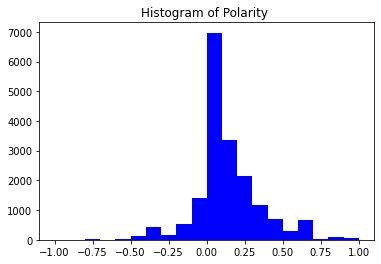

In [11]:
#DATA VISUALISATION

import seaborn as sns
import matplotlib.pyplot as plt 

# Plots histogram of polarity 
plt.subplot()
new_data["Polarity"].hist(bins=20,color='blue')
plt.title("Histogram of Polarity ")
plt.grid(b=None)

In [12]:
# Displays the most popular tweets
new_data.sort_values(by=["Likes_on_tweet" ], ascending=False)[["Tweet","Likes_on_tweet"]].head(10)

,Tweet,Likes_on_tweet
257,First it was #Rafale Then #NEP2020 Tomorrow #R...,6138
10257,First it was #Rafale Then #NEP2020 Tomorrow #R...,6133
17948,ENGLISH MEDIUM... Blessing or Curse for India....,2694
13837,The New Education Policy emphasises on concept...,2173
14967,DMK has always worked to ensure inclusive & qu...,1996
11347,~Not many people know that Raksha Bandhan is a...,1838
1347,~Not many people know that Raksha Bandhan is a...,1837
10523,"Under #NEP2020, #BoardExams will have greater ...",1575
523,"Under #NEP2020, #BoardExams will have greater ...",1573
10972,#NEP2020 lays emphasis on the promotion of Ind...,1530


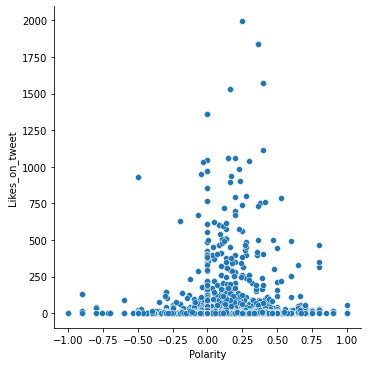

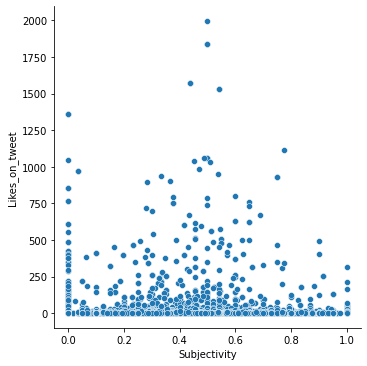

In [13]:
# Removes outliers
Top_Tweets = new_data[new_data["Likes_on_tweet"]<2000]

# Relationship between Top tweets and polarity
sns.relplot(x="Polarity", y="Likes_on_tweet", data=Top_Tweets)
# Relationship between Top tweets and subjectivity
sns.relplot(x="Subjectivity", y="Likes_on_tweet", data=Top_Tweets)

In [14]:
# Function that classifies polarities
def classify_polarity(polarity):
    if polarity > 0:
        return "Positive"
    if polarity == 0:
        return "Neutral"
    if polarity < 0:
        return "Negative"

# Applies the funtion on Polarity column and add the results into a new column "Label"
new_data["Label"] = new_data["Polarity"].apply(classify_polarity)

# Displays the Polarity and Subjectivity Analysis
new_data[["Label"]].head()

,Label
0,Positive
1,Neutral
2,Positive
3,Positive
4,Negative


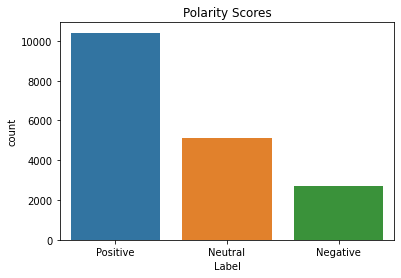

In [15]:
# Visualising the Label count
sns.countplot(x=new_data["Label"])
plt.title("Polarity Scores")
plt.show()

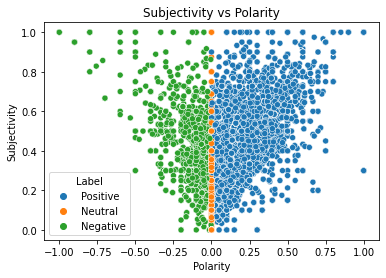

In [16]:
# Visualizing the Polarity scores
plt.figure() 
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Label", data=new_data)
plt.title("Subjectivity vs Polarity")
plt.show()

In [17]:
from wordcloud import WordCloud
from PIL import Image
import urllib
import requests

In [18]:
positive_words = ' '.join(text for text in new_data['Processed'][new_data['Polarity']==1])
negative_words = ' '.join(text for text in new_data['Processed'][new_data['Polarity']==-1])

(-0.5, 1138.5, 925.5, -0.5)

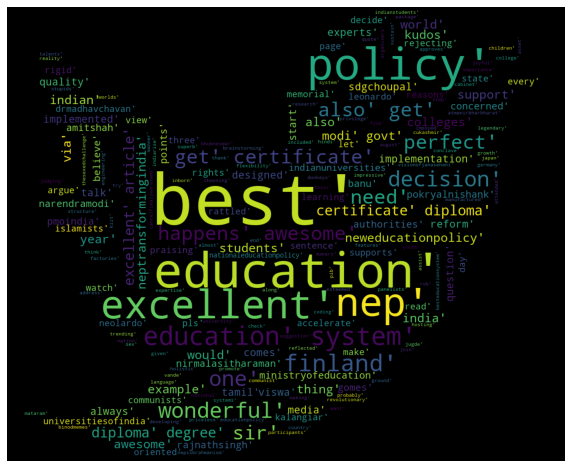

In [19]:
# Combines the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# Forms wordcloud
wc = WordCloud(background_color='black', mask= Mask).generate(positive_words)

# Size of the image generated 
plt.figure(figsize=(10,20))
 
plt.imshow(wc.recolor())
plt.axis('off')

(-0.5, 3999.5, 999.5, -0.5)

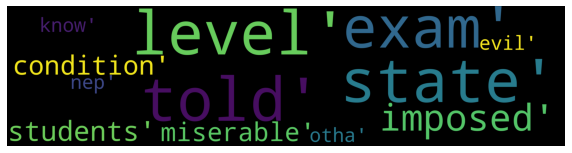

In [20]:
# Forms wordcloud
wc = WordCloud(background_color='black', height=1000, width=4000).generate(negative_words)

# Size of the image generated 
plt.figure(figsize=(10,20))
 
plt.imshow(wc.recolor())

plt.axis('off')

In [21]:
#BUILDING MACHINE LEARNING MODEL

In [22]:
from sklearn.preprocessing import LabelEncoder
#Encodes the labels
l = LabelEncoder()
new_data["LabelEnc"] = l.fit_transform(new_data["Label"])
display(new_data[["LabelEnc"]].head())

,LabelEnc
0,2
1,1
2,2
3,2
4,0


In [23]:
#Selects the features and the target
X = new_data['Processed']
y = new_data["LabelEnc"]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34, stratify=y)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creation the tf-idf vectorizer
vectorizer = TfidfVectorizer()
# Fits the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)
# Fits our test data with the vectorizer
tfidf_test = vectorizer.transform(X_test)

In [26]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

# Bernoulli Naive Bayes classifier
nb = BernoulliNB()
# Fits the model
nb.fit(tfidf_train, y_train)
# Prints the accuracy score
accuracy_nb = cross_val_score(nb, tfidf_test, y_test, cv=10, scoring='accuracy').mean()
print("Accuracy:",accuracy_nb)
# Prints the f1 score
f1_nb = cross_val_score(nb, tfidf_test, y_test, cv=10, scoring='f1_weighted').mean()
print("F1 score:",f1_nb)

Accuracy: 0.8106726804467634
F1 score: 0.8012164346701269


In [27]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dct = DecisionTreeClassifier()
# Fits the model
dct.fit(tfidf_train, y_train)
# Prints the accuracy score
accuracy_dct = cross_val_score(dct, tfidf_test, y_test, cv=10, scoring='accuracy').mean()
print("Accuracy:",accuracy_dct)
# Prints the f1 score
f1_dct = cross_val_score(dct, tfidf_test, y_test, cv=10, scoring='f1_weighted').mean()
print("F1 score:",f1_dct)

Accuracy: 0.9018645164733984
F1 score: 0.8992815529154393


In [28]:
from xgboost import XGBClassifier

# Gradient Boost Classifier
xgb = XGBClassifier()
# Fits the model
xgb.fit(tfidf_train, y_train)
# Prints the accuracy score
accuracy_xgb = cross_val_score(xgb, tfidf_test, y_test, cv=10, scoring='accuracy').mean()
print("Accuracy:",accuracy_xgb)
# Prints the f1 score
f1_xgb = cross_val_score(xgb, tfidf_test, y_test, cv=10, scoring='f1_weighted').mean()
print("F1 score:",f1_xgb)

Accuracy: 0.847038924992327
F1 score: 0.8462915622772638


In [29]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lg= LogisticRegression()
# Fit the model
lg.fit(tfidf_train, y_train)
# Prints the accuracy score
accuracy_lg = cross_val_score(lg, tfidf_test, y_test, cv=10, scoring='accuracy').mean()
print("Accuracy:",accuracy_lg)
# Prints the f1 score
f1_lg = cross_val_score(lg, tfidf_test, y_test, cv=10, scoring='f1_weighted').mean()
print("F1 score:",f1_lg)

Accuracy: 0.8735384779620757
F1 score: 0.8690935914109147


In [30]:
Algo=['Bernoulli Naive Bayes(TF-IDF)','DecisionTree(TF-IDF)','XGBoost(TF-IDF)','LogisticRegression(TF-IDF)']
score = [accuracy_nb,accuracy_dct,accuracy_xgb,accuracy_lg]
compare=pd.DataFrame({'Model':Algo,'Accuracy':score},index=[i for i in range(1,5)])
compare.T

,1,2,3,4
Model,Bernoulli Naive Bayes(TF-IDF),DecisionTree(TF-IDF),XGBoost(TF-IDF),LogisticRegression(TF-IDF)
Accuracy,0.810673,0.901865,0.847039,0.873538


In [31]:
Algo=['Bernoulli Naive Bayes(TF-IDF)','DecisionTree(TF-IDF)','XGBoost(TF-IDF)','LogisticRegression(TF-IDF)']
score = [f1_nb,f1_dct,f1_xgb,f1_lg]
compare=pd.DataFrame({'Model':Algo,'F1 score':score},index=[i for i in range(1,5)])
compare.T

,1,2,3,4
Model,Bernoulli Naive Bayes(TF-IDF),DecisionTree(TF-IDF),XGBoost(TF-IDF),LogisticRegression(TF-IDF)
F1 score,0.801216,0.899282,0.846292,0.869094


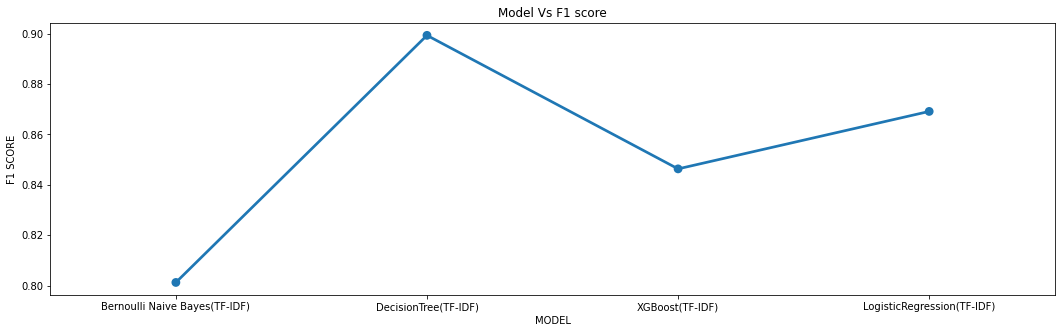

In [32]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1 score',data=compare)

plt.title('Model Vs F1 score')
plt.xlabel('MODEL')
plt.ylabel('F1 SCORE')

plt.show()